# ML LAB 07 - K Means Clustering
### Name : Tulasi Raman R
### Register Number : 21MIS1170

# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as pl
import numpy as np
from sklearn import metrics

# Import Dataset

In [4]:
df = pd.read_csv("Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
df.shape

(7050, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [7]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

### Fortunately we don't have any null values in between the dataset. But in Column1, Column2, Column3 and Column4, it is found that the entire coulmn has missing values. So we'll these columns.

In [8]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

array([[<Axes: title={'center': 'num_reactions'}>,
        <Axes: title={'center': 'num_comments'}>,
        <Axes: title={'center': 'num_shares'}>],
       [<Axes: title={'center': 'num_likes'}>,
        <Axes: title={'center': 'num_loves'}>,
        <Axes: title={'center': 'num_wows'}>],
       [<Axes: title={'center': 'num_hahas'}>,
        <Axes: title={'center': 'num_sads'}>,
        <Axes: title={'center': 'num_angrys'}>]], dtype=object)

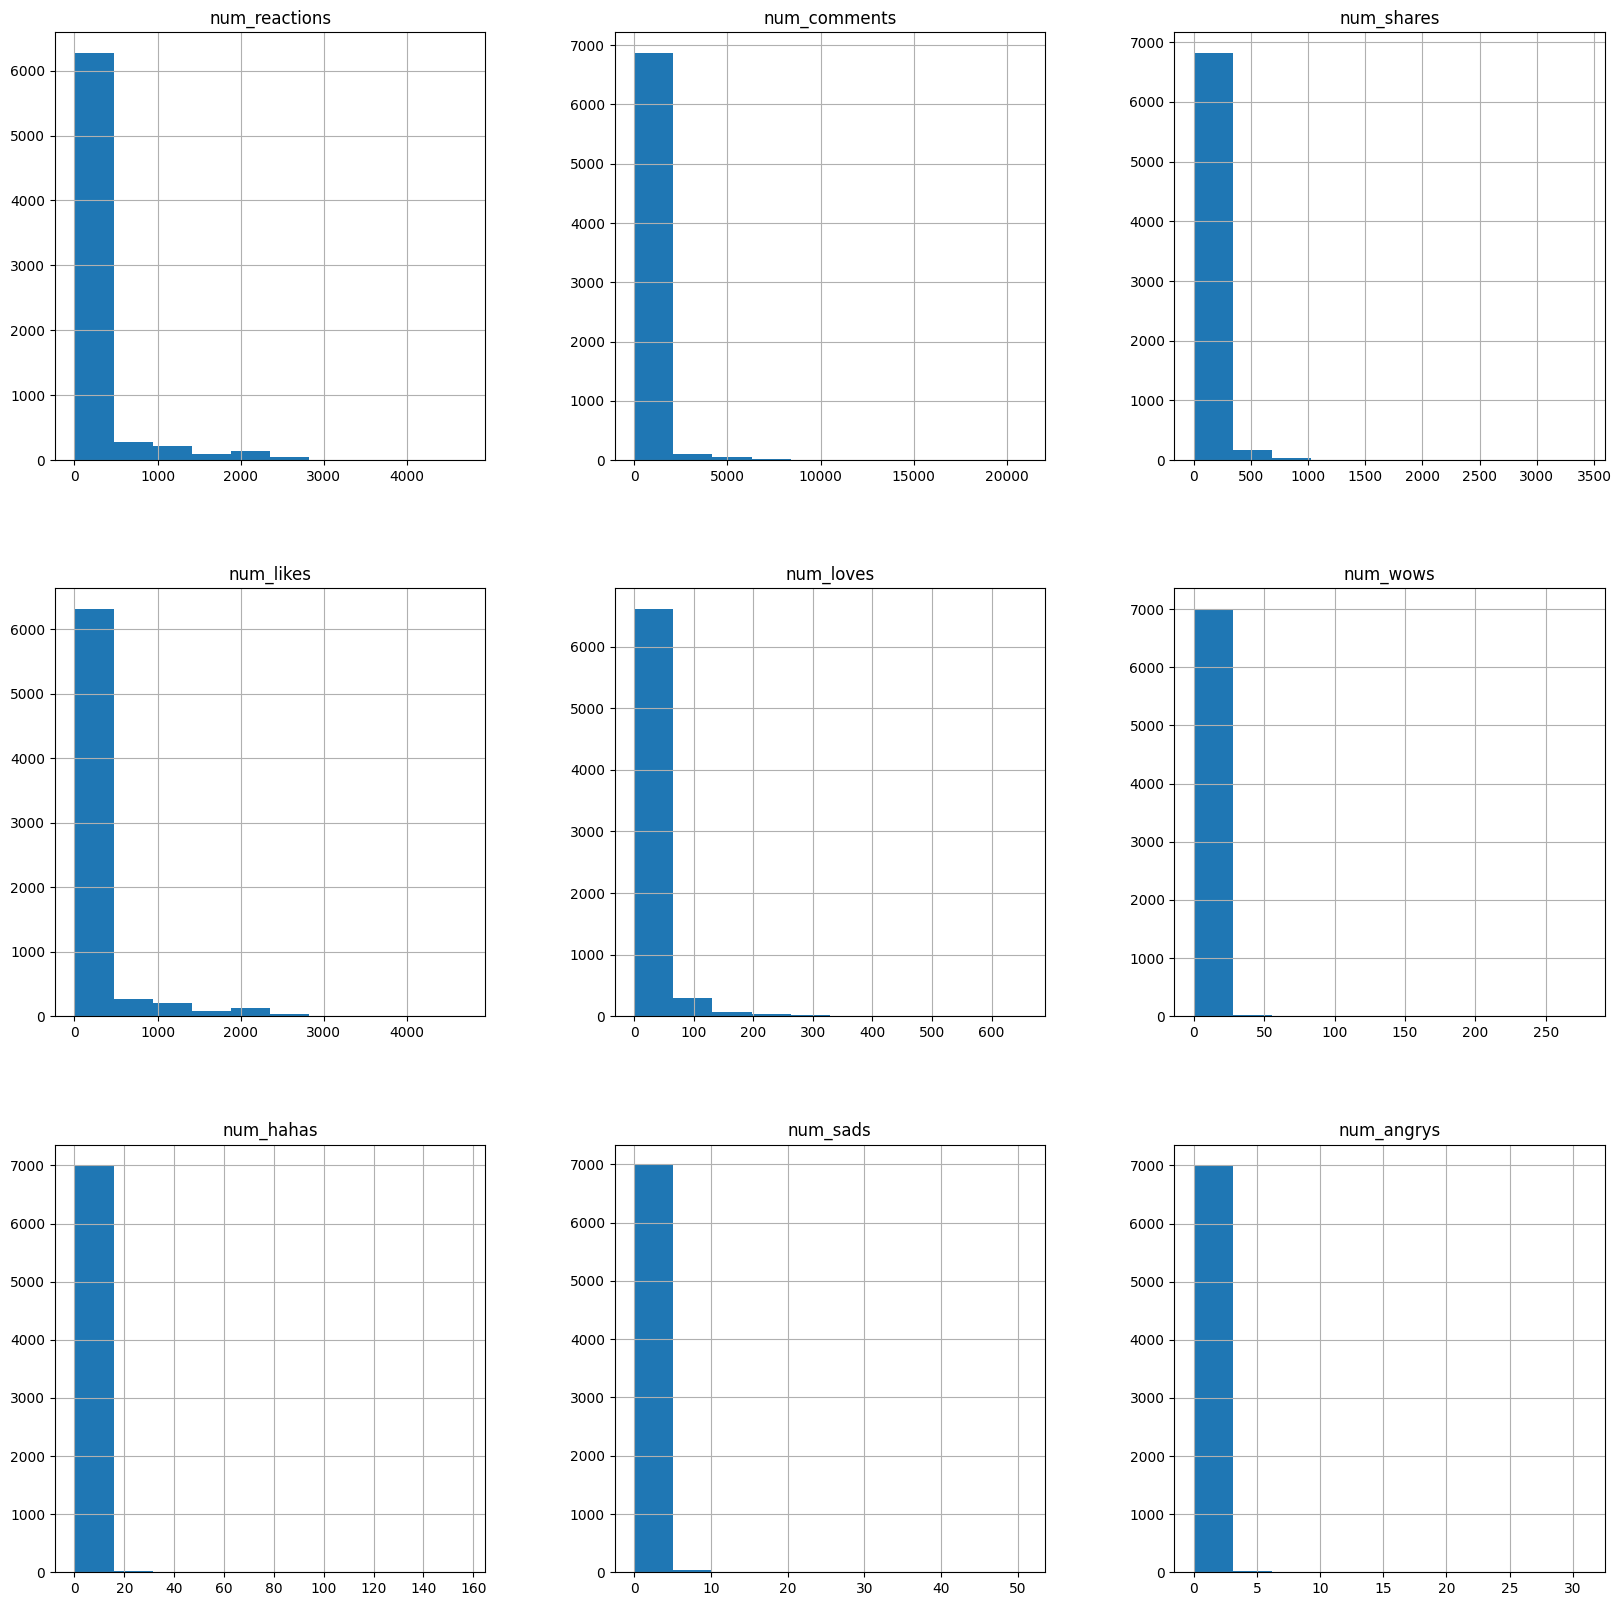

In [9]:
df.hist(figsize=(20,20))

In [11]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

- 'status_id' doesn't contribute much in prediction.
- 'status_published' is a string and cannot be converted to numerical datatype as it an approxiamately unique identifier

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


# Converting Categorical to Numerical Data for Clustering

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['status_type'] = le.fit_transform(df['status_type'])

In [14]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


# Scaler Fit

In [94]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
print(scaled)

[[1.00000000e+00 1.12314225e-01 2.43925679e-02 ... 1.96078431e-02
  0.00000000e+00 0.00000000e+00]
 [3.33333333e-01 3.18471338e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 4.81953291e-02 1.12434493e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.33333333e-01 4.24628450e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.33333333e-01 7.45222930e-02 5.71700810e-04 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.33333333e-01 3.60934183e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]


# K means with two clusters

In [95]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(scaled)

y_predicted = kmeans.fit_predict(scaled)
y_predicted

array([0, 1, 0, ..., 1, 1, 1])

In [96]:
df['cluster']=y_predicted

In [97]:
kmeans.cluster_centers_

array([[ 9.54921576e-01,  6.46330441e-02,  2.67028654e-02,
         2.93171709e-02,  5.71231462e-02,  4.71007076e-02,
         8.18581889e-03,  9.65207685e-03,  8.04219428e-03,
         7.19501847e-03, -6.66133815e-16],
       [ 3.28506857e-01,  3.90710874e-02,  7.54854864e-04,
         7.53667113e-04,  3.85438884e-02,  2.17448568e-03,
         2.43721364e-03,  1.20039760e-03,  2.75348016e-03,
         1.45313276e-03,  1.00000000e+00]])

In [98]:
kmeans.inertia_

237.75726404419538

- K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.
- The lesser the model inertia, the better the model fit. Here we have high value, so not a good method.

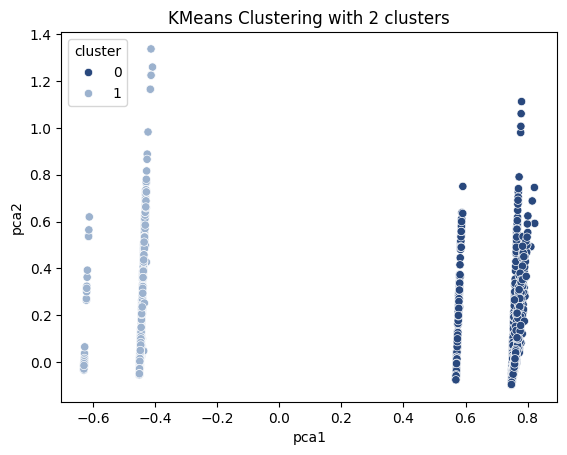

In [99]:
reduced_data = PCA(n_components=2).fit_transform(scaled)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
pal = ["#29487D", "#9CB2CE"]

sns.scatterplot(x="pca1", y="pca2", hue=df['cluster'], data=results, palette=pal)
plt.title('KMeans Clustering with 2 clusters')
plt.show()

# Elbow method

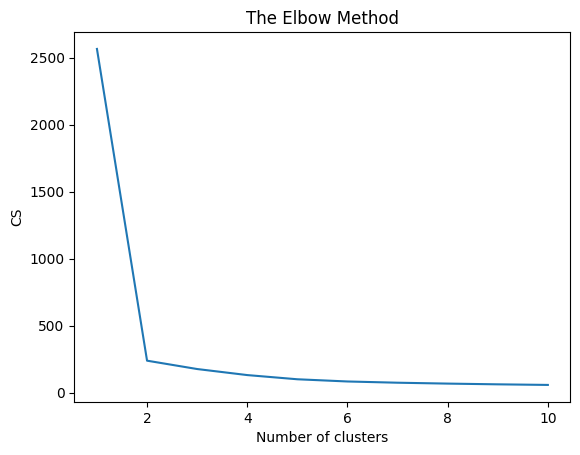

In [100]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

- By the above plot, we can see that there is a kink at k=3. 

- Hence k=3 can be considered a good number of the cluster to cluster this data.

# K Means with 3 Clusters

In [101]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0) 
kmeans.fit(scaled)

y_predicted = kmeans.fit_predict(scaled)
y_predicted

array([3, 1, 3, ..., 1, 1, 1])

In [102]:
df['cluster']=y_predicted

In [103]:
kmeans.cluster_centers_

array([[6.66666667e-01, 6.44499303e-02, 1.50592985e-03, 6.92985124e-04,
        6.37784394e-02, 2.42270316e-03, 3.62904942e-03, 7.53778314e-04,
        8.17960320e-03, 8.58942546e-04, 2.22044605e-16],
       [3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03, 1.00000000e+00],
       [9.58333333e-01, 3.43026067e-01, 8.14045048e-02, 1.15021417e-01,
        3.08393292e-01, 2.03527538e-01, 7.16593392e-02, 4.50577967e-02,
        2.49636892e-02, 3.59916368e-02, 2.22044605e-16],
       [1.00000000e+00, 3.66279156e-02, 2.51648748e-02, 2.51972910e-02,
        3.07717053e-02, 3.83888055e-02, 2.51211618e-03, 7.48890176e-03,
        6.31655926e-03, 5.29363110e-03, 0.00000000e+00]])

In [104]:
kmeans.inertia_

161.33504530872352

C:\Users\VICKY\AppData\Local\Temp\ipykernel_33672\2186594694.py:5: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x="pca1", y="pca2", hue=df['cluster'], data=results, palette=pal)


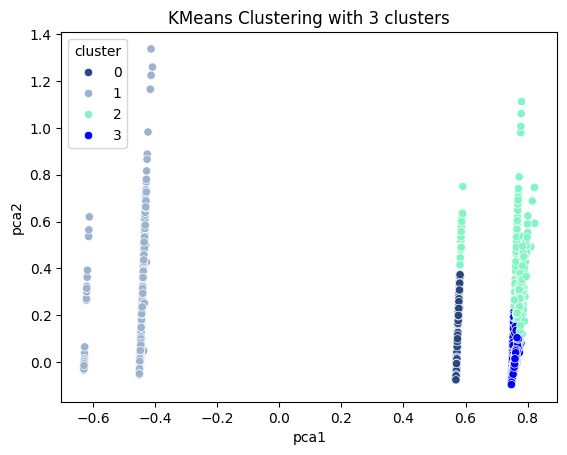

In [105]:
reduced_data = PCA(n_components=2).fit_transform(scaled)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
pal = ["#29487D", "#9CB2CE", "#83f5c5","#0000FF","#F000FF","#000000","#C5C4C5","#EA4343"]

sns.scatterplot(x="pca1", y="pca2", hue=df['cluster'], data=results, palette=pal)
plt.title('KMeans Clustering with 3 clusters')
plt.show()

# Model Interpretation

- The dataset is unlabelled and we need to find the similarities between the dataset. So we go for unsupervised clustering methods such as K means.
- Intially we tried with k=2, but later we concluded that the optimal number of clusters are k=3 using Elbow method by noticing a major kink at k = 3.
- We after moving to k=3 clusters, we found that the inietria = 2735263889.752016 is still extremely high. Lower the initeria, better the model is, so we can conclude that the model is not a good fit.